# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импортируем все нужные библиотеки, посомтрим на первые 5 строк сета, вызовем метод info и посчитаем пропуски

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#делит высоту потолков на 10
def tall_height (t):
    try:
        if 20 <= t <= 32:
            return t / 10
        return t
    except:
        pass
    
# проверят какой этаж и делает вывод: первый, последний, другой    
def floor_disunion(rooms):
    try:
        if rooms['floor'] == 1:
            return 'первый'
        elif rooms['floor'] == rooms['floors_total']:
            return 'последний'
        elif 1 < rooms['floor'] < rooms['floors_total']:
            return 'другой'
        else:
            return 'ошибка2'
    except:
        return 'ошибка'
    
# проверят какой этаж и делает вывод: 1, 2, 3, для  гистограммы      
def floor_disunion_new(rooms):
    try:
        if rooms['floor_disunion'] == 'первый':
            return '1'
        elif rooms['floor_disunion'] == 'последний':
            return '3'
        elif rooms['floor_disunion'] == 'другой':
            return '2'
        else:
            return 'ошибка2'
    except:
        return 'ошибка'  
    
# получает на вход до 4 параметров, строит гистограмму, отсекает выбросы    
def histogram(data, heading='гистограмма', quantile1=0.01, quantile2=0.99):
    print(f'Среднее значение: {data.mean().round(2)}')
    print(f'Медианное значение: {data.median().round(2)}')
    print(f'Минимальное значение: {data.min().round(2)}')
    print(f'Максимальное значение: {data.max().round(2)}')
    q1 = data.quantile(quantile1)
    q2 = data.quantile(quantile2)
    data.hist(bins=30, range=(q1,q2), color='steelblue',figsize=(15, 5), ec="darkgrey")
    plt.xlabel(heading) 
    plt.show()    
    
# оставлю тут, вдруг пригодится     
#def histogram2(data, heading='гистограмма', quantile1=0.01, quantile2=0.99):
#     q1 = df[data].quantile(quantile1)
#     q2 = df[data].quantile(quantile2)
#     df[df[data].between(q1,q2)][data].hist(bins=40, color='steelblue',figsize=(15, 5), ec="darkgrey")
#     plt.xlabel(heading)
#     plt.show()

In [5]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
print('Количество уникальных значений в каждой колонке:')
for index in df.columns:
    row = df[index].nunique()
    print(f'Уникальный значений {index}: {row}')

Количество уникальных значений в каждой колонке:
Уникальный значений total_images: 38
Уникальный значений last_price: 2978
Уникальный значений total_area: 2182
Уникальный значений first_day_exposition: 1491
Уникальный значений rooms: 17
Уникальный значений ceiling_height: 183
Уникальный значений floors_total: 36
Уникальный значений living_area: 1782
Уникальный значений floor: 33
Уникальный значений is_apartment: 2
Уникальный значений studio: 2
Уникальный значений open_plan: 2
Уникальный значений kitchen_area: 971
Уникальный значений balcony: 6
Уникальный значений locality_name: 364
Уникальный значений airports_nearest: 8275
Уникальный значений cityCenters_nearest: 7642
Уникальный значений parks_around3000: 4
Уникальный значений parks_nearest: 995
Уникальный значений ponds_around3000: 4
Уникальный значений ponds_nearest: 1096
Уникальный значений days_exposition: 1141


**Описание данных**  
В датафрейме 23699 строк и 22 столбца

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)    
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  

In [8]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Пропусков много, постараемся максимально заполнить их данными.

Повызываем команды, поизучаем, что есть в Dataframe.  
*Больше всего пропусков в is_apartment, формат у него object, посомтрим что там есть. Так же интерес вызвали балконы, половина пропусков, посмотрим какие там значения.*  

In [9]:
df['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

In [10]:
df['balcony'].value_counts(dropna=False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Выведем уникальные значения из locality_name

In [11]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [12]:
df['locality_name'].nunique()

364

364 населенных пункта, позже проверим на явные и неявные дубликаты.

Далее вызовем метод describe, посмотрим на минимальные, максимальные, средние и тд значения.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [14]:
df[
    ['total_images','last_price', 'total_area', 'rooms','ceiling_height', 'floors_total', 'living_area',
     'floor', 'kitchen_area', 'balcony']
        ].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000


In [15]:
df[df['rooms']==19]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,NaN,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0


In [16]:
df[df['last_price'] == df['last_price'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,False,False,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


In [17]:
df[df['last_price'] == df['last_price'].min()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


In [18]:
df[df['total_area'] == df['total_area'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


In [19]:
df[df['living_area'] == df['living_area'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,False,False,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


In [20]:
df[df['floors_total'] == df['floors_total'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,False,False,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0


Посмотрели некоторые максимальные и минимальные значения, скорее всего объекты настоящие, но они могут сильно исказить исследование, позже подумаем, что с ними делать. Так же есть аномальные значения, 60 этаж в СПБ или высота потолков 100 метров, есть очень дешевые лоты

Построим общую гистограмму для всех числовых столбцов таблицы, посмотрим на распределение. Количество столбцов укажем 25

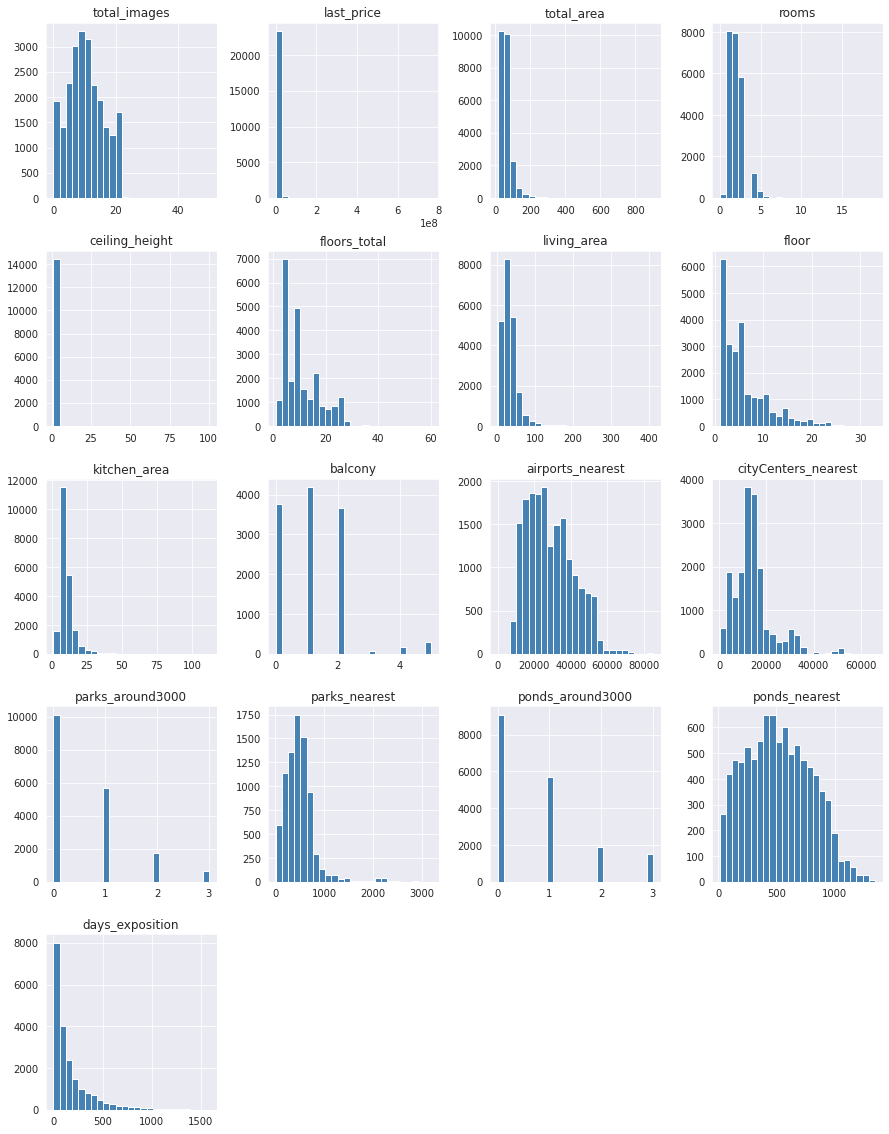

In [21]:
sns.set_style("darkgrid")
df.hist(bins=25, color='steelblue',figsize=(15, 20))
plt.show()

По гистограммам видно, что выбросы есть, но их не так много

**Вывод:** Можно сказать, что данные хорошие. Датфрейм большой, 22 колонки, почти 24000 строк. Если пропуски, которые нужны для исследования заполнить, и произвести минимум удалений, может получится полномасштабное исследование.

### Предобработка данных

In [22]:
df.duplicated().sum()

0

Явных дубликатов нет  
Выведем еще раз пропуски и по порядку начнем их смотреть/заполнять.

In [23]:
df.isnull().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Ранее мы уже смотрели `is_apartment`, у нас есть 50 True, 2725 False и 20924 пропусков.
Можно предположить, что продавцы, которые являются владельцами апартаментов указывают это в объявлении. Значит все пропуски можно заменить на False.
В данный момент мы не планируем использовать этот столбец для исследования, оставим его без изменения, в случае необходимости, заполним.

Парки, пруды, аэропорт оставим на потом, пока не понимаю, нужны мне эти данные для исследования или нет.  

Балконы: у нас 11519 пропусков, почти 50% сета. Наличие балкона может влиять на цену квартиры, можно предположить, что когда балкона нет, продавцы оставляют поле пустым. Мы можем заполнить пропуски 0, тогда получится распределение  
1.0  -  4195  
0.0  -  15277  
2.0  -  3659  
5.0  -  304  
4.0  -  183  
3.0  -  81  
Почти 65% квартир без балкона. Странно , но вполне возможно.
Зайдем на [Домклик](https://spb.domclick.ru/?from=topline2020) и посомтрим какое сейчас соотношение квартир в СПБ и ЛО. С балконом 51765 / всего 120272, получается в данный момент у порядка 57% объявлений не указано наличие балкона. Посмотрим на фотографии этих квартир. Фотографии подтверждают гипотезу, балконов нет, заполняем нулями  

Изменит тип данных на int , тк не бвает 1,5 балкона

In [24]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')

проверяем 

In [25]:
df['balcony'].value_counts(dropna=False)

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

Для продолжения исследования можно привести в порядок названия населенных пунктов. Вполне достаточно будет Ё заменить Е и привести все к нижнему регистру, но я решил оставить только название населенного пункта, это позволит укрупнить группы.

In [26]:
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [27]:
df['locality_name'] = df['locality_name'].replace('поселок|деревня|городской|городского типа|село ', '', regex=True)
df['locality_name'] = df['locality_name'].str.strip()

In [28]:
print(f'Всего населенных пунктов: {df["locality_name"].nunique()}')
print(f'Пустых значений: {df["locality_name"].isna().sum()}')

Всего населенных пунктов: 311
Пустых значений: 49


Удалим пустые объекты, такие лоты не интересны покупателям и не интересные нам для исследования, тк нет возможности определить их расположение.

In [29]:
df = df.dropna(subset=['locality_name']).reset_index(drop=True) 
df['locality_name'].value_counts()[:5]

санкт-петербург    15721
мурино               590
кудрово              472
шушары               440
всеволожск           398
Name: locality_name, dtype: int64

`ceiling_height` важный параметр, нужен нам для исследования, проверим на аномалии, просчитаем среднее, медиану и подумаем, как заполнять.

In [30]:
print(f"Минимальная высота потолка: {df['ceiling_height'].min()}")
print(f"Максимальная высота потолка: {df['ceiling_height'].max()}")

Минимальная высота потолка: 1.0
Максимальная высота потолка: 100.0


In [31]:
print(f'Среднее значение: {df["ceiling_height"].mean()}')
print(f'Медианное значение: {df["ceiling_height"].median()}')
print(f'Среднее значение в СПб: {df[df["locality_name"] =="санкт-петербург"]["ceiling_height"].mean()}')
print(f'Медианное значение СПб: {df[df["locality_name"] =="санкт-петербург"]["ceiling_height"].median()}')
print(f'Среднее значение не в СПб: {df[df["locality_name"] !="санкт-петербург"]["ceiling_height"].mean()}')
print(f'Медианное значение не СПб: {df[df["locality_name"] !="санкт-петербург"]["ceiling_height"].median()}')

Среднее значение: 2.7712870945479646
Медианное значение: 2.65
Среднее значение в СПб: 2.8037094220110848
Медианное значение СПб: 2.7
Среднее значение не в СПб: 2.696595987232102
Медианное значение не СПб: 2.6


Медианное значение высоты потолков отличается по городам. Заполним пропуски согласно городу, если значений мало, заполним общим

In [32]:
for t in df['locality_name'].unique():
        median = df.loc[df['locality_name'] == t, 'ceiling_height'].median()
        if (df['locality_name'] == t).sum()> 10:
            df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == t), 'ceiling_height'] = median
        else:
            df.loc[(df['ceiling_height'].isna()), 'ceiling_height'] = df['ceiling_height'].median()

Проверяем

In [33]:
df["ceiling_height"].isna().sum()

0

In [34]:
df['ceiling_height'].sort_values()[0:5]

22544    1.00
5702     1.20
16904    1.75
19063    2.00
11333    2.00
Name: ceiling_height, dtype: float64

In [35]:
df['ceiling_height'].sort_values(ascending = False)[0:6]

22822    100.0
22291     32.0
3144      32.0
21334     27.5
21780     27.0
17825     27.0
Name: ceiling_height, dtype: float64

In [36]:
df.query('ceiling_height <= 2.1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,NaN,False,False,6.50,0,санкт-петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2570,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.0,4,NaN,False,False,6.00,1,луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4205,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.6,9,NaN,False,False,8.80,2,тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5702,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,False,False,5.20,0,мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5840,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,NaN,False,False,NaN,0,луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11333,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.2,12,NaN,False,False,10.10,0,металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
16419,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.9,2,NaN,False,False,12.00,0,санкт-петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16854,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.0,5,False,False,False,6.00,0,выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
16904,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,False,False,8.34,0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
19063,7,2700000.0,56.00,2018-02-04T00:00:00,3,2.00,5.0,46.0,1,NaN,False,False,6.00,0,выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0


In [37]:
len(df.query('ceiling_height <= 2.1'))

14

С высотой потолков менее 2,1м получается 14 квартир, все они не являются апартаментами. Согласно сайту [КонсультантПлюс](https://www.consultant.ru/document/cons_doc_LAW_58136/85f7dc8994f991a1132725df3886eeefc605e1b9/)  
Высота (от пола до потолка) комнат и кухни (кухни-столовой) в климатических районах IА, IБ, IГ, IД и IVа должна быть не менее 2,7 м, а в других климатических районах - не менее 2,5 м. Высота внутриквартирных коридоров, холлов, передних, антресолей должна составлять не менее 2,1 м. Все эти квартиры мы удалим из сета.  
Посмотрим на квартиры с высотой потолка от 20м

In [38]:
df.query('ceiling_height >= 20').sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17466,15,6700000.0,92.9,2019-02-19T00:00:00,3,20.0,17.0,53.2,14,NaN,False,False,12.0,5,санкт-петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN
20469,12,5950000.0,60.0,2018-02-19T00:00:00,2,22.6,14.0,35.0,11,NaN,False,False,13.0,1,санкт-петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0
5068,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,0,санкт-петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,False,NaN,2,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
18512,6,3750000.0,43.0,2019-03-18T00:00:00,2,25.0,5.0,29.0,3,False,False,False,NaN,0,санкт-петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12.0
14357,9,1700000.0,35.0,2015-12-04T00:00:00,1,25.0,5.0,20.0,2,False,False,False,8.0,1,новый свет,NaN,NaN,NaN,NaN,NaN,NaN,206.0
9363,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,False,False,5.2,0,санкт-петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN
6236,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,False,False,5.7,0,кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
11266,0,1950000.0,37.0,2019-03-20T00:00:00,1,25.0,5.0,17.0,4,False,False,False,9.0,2,луга,NaN,NaN,NaN,NaN,NaN,NaN,18.0
4636,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1,санкт-петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0


In [39]:
print(f"Количество квартир с высотой потолка более 20 метров: {len(df.query('ceiling_height >= 20'))}")

Количество квартир с высотой потолка более 20 метров: 23


Квартиру с потолками 100м удалим из таблицы, квартиры с высотой от 20 до 32 поделим на 10, скорее всего пользователи или забыли поставить разделитель или поставили нетипичный знак.

In [40]:
df['ceiling_height'] = df['ceiling_height'].apply(tall_height) 

С квартирами разобрались, теперь внимательно посмотрим на локацию, в 4 категориях почти одинаковое количество пропусков. 
Проверим гипотезу, что есть проблема с заполнением картографических данных

In [41]:
location = df[(df['airports_nearest'].isna() == True) 
   & (df['cityCenters_nearest'].isna() == True) 
       & (df['ponds_around3000'].isna() == True)]
location.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              10
living_area              622
floor                      0
is_apartment            4887
studio                     0
open_plan                  0
kitchen_area             713
balcony                    0
locality_name              0
airports_nearest        5510
cityCenters_nearest     5510
parks_around3000        5510
parks_nearest           5510
ponds_around3000        5510
ponds_nearest           5510
days_exposition          864
dtype: int64

Проблема имеется, надо сообщить разработчикам, трогать их пока не будем
В задании нам надо описать связь цены квадратного метра и расстояние до центра, подумаем, что делать с `cityCenters_nearest`.

Пропущено порядка четверти значений, удалять их нельзя, забивать  средним тоже не правильно, это может сильно искажать выборку. Для понимания ситуации посмотрим сколько пропущено значений в СПб и медианное значение для Санкт-Петербурга. Во время выводов будем держать это в голове

In [42]:
print(f"Растояние до цента СПб не указано в: {df[df['locality_name'] == 'санкт-петербург']['cityCenters_nearest'].isna().sum()} значениях")
df[df['locality_name'] == 'санкт-петербург']['cityCenters_nearest'].median()

Растояние до цента СПб не указано в: 61 значениях


12244.5

Не хватает данных об этажности дома, это столбец `floors_total`, хоть там всего и 85 значений, удалять не будем.
Укажем просто + 1 к квартире из обьявления, тип данных укажем int. Так же в начале мы выявили в этом столбце аномалии, поправим их.

In [43]:
df[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.7,NaN,30.80,4,NaN,False,False,12.00,0,санкт-петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.7,NaN,20.75,1,NaN,False,False,NaN,0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.7,NaN,38.40,12,NaN,False,False,10.63,0,санкт-петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.7,NaN,47.10,8,NaN,False,False,16.80,0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1756,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.7,NaN,NaN,9,NaN,False,False,NaN,0,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22496,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,False,False,NaN,0,санкт-петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22610,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.7,NaN,31.70,20,NaN,False,False,14.40,0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22761,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.7,NaN,45.38,6,NaN,False,False,23.42,0,санкт-петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23541,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.7,NaN,50.40,18,NaN,False,False,23.60,0,санкт-петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [44]:
df.loc[df['floors_total'].isna(), 'floors_total'] = df.loc[df['floors_total'].isna(), 'floor'] + 1

In [45]:
 df[df['floors_total'] > 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2251,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,False,False,7.4,0,кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16701,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,False,False,14.0,0,санкт-петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


Кронштадт старинный город, пригород СПБ, город является Кронштадтским районом Санкт-Петербурга. В основном дома до 6 этажей, есть несколько высоток, но 60 этажей там нет.
В СПб самый высокий этаж 37 - ЖК "Князь Александр Невский"  
Удалять не будем, просто поменяем значение 60 на 6 , 52 на 25 . На результатах исследования это не скажется 

In [46]:
df['floors_total'] = df['floors_total'].replace(60, 6)
df['floors_total'] = df['floors_total'].replace(52, 25)

Проверим, что у нас нет значения , когда последний этаж ниже, чем этаж в объявлении.

In [47]:
t = df['floors_total'] - df['floor'] < 0
t.sum()

0

Приведем значение количества этажей к целым числам, т.к не бывает 1,5 этажа

In [48]:
df['floors_total'] =df['floors_total'].astype('int')   

по пропускам осталось:
* жилая площадь 8%  
* площадь кухни 9.6%  
создадим тестовый датафрейм посмотрим на связь общей площади, жилой и площади кухни

In [49]:
t = df[['total_area', 'living_area', 'kitchen_area']]
t

,total_area,living_area,kitchen_area
0,108.00,51.0,25.00
1,40.40,18.6,11.00
2,56.00,34.3,8.30
3,159.00,NaN,NaN
4,100.00,32.0,41.00
...,...,...,...
23645,133.81,73.3,13.83
23646,59.00,38.0,8.50
23647,56.70,29.7,NaN
23648,76.75,NaN,23.30


In [50]:
print(len(df[(df['kitchen_area'].isna() == True) & (df['studio'] == True)]))
print(len(df[(df['kitchen_area'].isna() == True) & (df['living_area'].isna()  == True)]))
print(len(df[(df['kitchen_area'].isna() == True) & (df['living_area'].isna()  == True) & (df['is_apartment'] == True)]))

149
1460
6


In [51]:
t.describe()

,total_area,living_area,kitchen_area
count,23650.000000,21752.000000,21381.000000
mean,60.329069,34.448356,10.566403
std,35.661808,22.037664,5.901753
min,12.000000,2.000000,1.300000
25%,40.000000,18.600000,7.000000
50%,52.000000,30.000000,9.100000
75%,69.700000,42.300000,12.000000
max,900.000000,409.700000,112.000000


Посмотрим на взаимосвязь

In [52]:
t.corr()

,total_area,living_area,kitchen_area
total_area,1.000000,0.939534,0.608879
living_area,0.939534,1.000000,0.428773
kitchen_area,0.608879,0.428773,1.000000


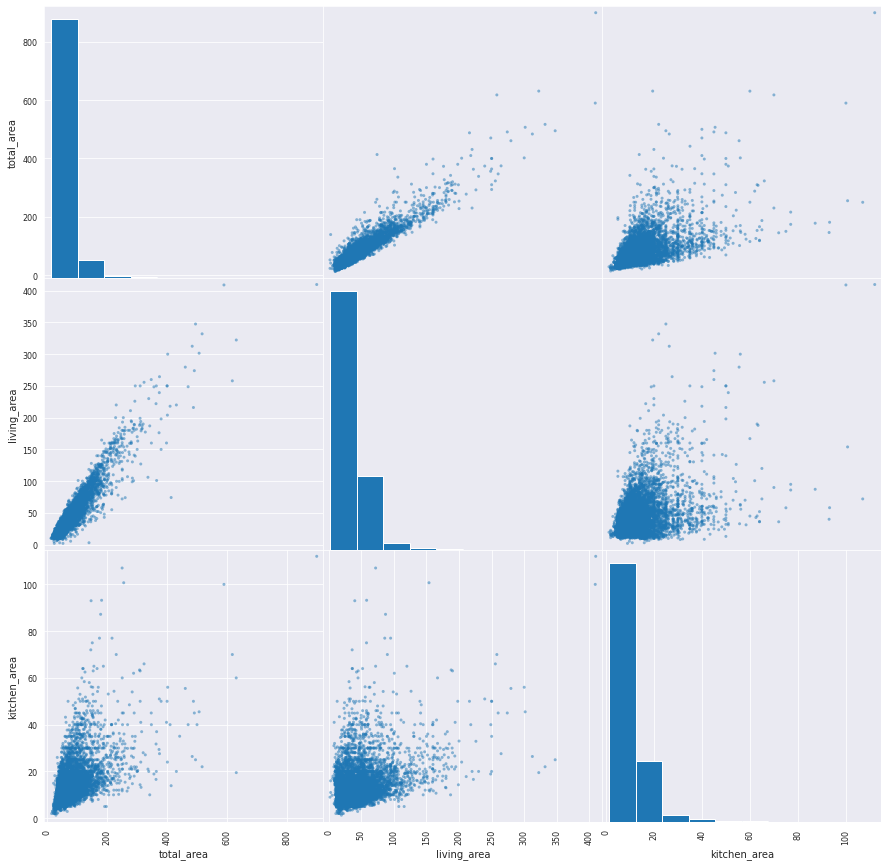

In [53]:
pd.plotting.scatter_matrix(t, alpha=0.5, figsize=(15, 15))
plt.show()

Видна сильная взаимосвязь жилой и общей площади, связь между площадью кухни и общей слабее, линейной корреляции кухни и жилой почти нет.  В нашей выборке нет даты строительства дома, в последнее время пошел тренд на квартиры с маленькой комнатой и большой кухней. Т.к у нас нет кухонь со значение 0 , заполним пока размер кухни 0.Если будет необходимость, будем использовать фильтры, что бы эти значения обойти. В случае необходимости, мы сможем позже изменить значение.  
Для заполнения жилой площади, высчитаем коэффициент зависимости жилая/обшая и заполним по аналогии.

In [54]:
print(df[df['kitchen_area'] == 0]['kitchen_area'].count())
ratio = df['living_area'] / df['total_area']
print(ratio.mean())
print(ratio.median())

0
0.5647499988246565
0.5678598992678503


In [55]:
df.loc[df['living_area'].isna(), 'living_area'] = (df.loc[df['living_area'].isna(), 'total_area'] * ratio.mean()).round(1)

In [56]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)

Проверяем, что не осталось пустых значений

In [57]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Общая площадь должна быть больше суммы жилой и кухни, если это условие не соблюдается, удалим эти строки. Так же у нас есть значения, где жилая площадь меньше 5 м., удалим и эти строки    

In [58]:
((df['total_area'] - (df['living_area'] + df['kitchen_area']) < 0) | (df['living_area'] <= 5)).sum()

77

In [59]:
print(df.shape)
df = df[(df['total_area'] - (df['living_area'] + df['kitchen_area']) >= 0) & (df['living_area'] > 5)]
df.shape

(23650, 22)


(23573, 22)

Была подозрительно дешевая квартира, не хотел вообще ее трогать, возможно пользователь думал, что цена в $ и можно пересчитать, но удалим ее

In [60]:
df[df['last_price'] == 12190.0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8778,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25,32.0,25,NaN,False,False,40.5,0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


In [61]:
df = df.drop(index = 8778)

Проверим тип данных 

In [62]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Приведем `first_day_exposition` к формату дата

In [63]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [64]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23572 entries, 0 to 23571
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23572 non-null  int64         
 1   last_price            23572 non-null  float64       
 2   total_area            23572 non-null  float64       
 3   first_day_exposition  23572 non-null  datetime64[ns]
 4   rooms                 23572 non-null  int64         
 5   ceiling_height        23572 non-null  float64       
 6   floors_total          23572 non-null  int64         
 7   living_area           23572 non-null  float64       
 8   floor                 23572 non-null  int64         
 9   is_apartment          2742 non-null   object        
 10  studio                23572 non-null  bool          
 11  open_plan             23572 non-null  bool          
 12  kitchen_area          23572 non-null  float64       
 13  balcony         

**Вывод:** Изначально у нас был датафрейм на 23699 строк, за время обработки мы постарались удалить минимум значений. В данный момент у нас 23572 строк, удалили 127. Все нужные для исследования пропуски заполнили, привели в порядок типы данных

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в сет новые столбы: цена одного квадратного метра, день публикации объявления, месяц публикации, год. Так же выделим три типа этажей первый, последний, другой.

In [65]:
df['price_meter'] = (df['last_price'] / df['total_area']).round(2)

In [66]:
df['day_submission'] = df['first_day_exposition'].dt.weekday
df['month_submission'] = df['first_day_exposition'].dt.month 
df['year_submission'] = df['first_day_exposition'].dt.year
df[['first_day_exposition', 'day_submission', 'month_submission', 'year_submission']].sample(5)

,first_day_exposition,day_submission,month_submission,year_submission
2109,2016-11-24,3,11,2016
20682,2016-09-21,2,9,2016
19574,2018-07-12,3,7,2018
17749,2018-12-03,0,12,2018
13239,2017-07-10,0,7,2017


In [67]:
df['floor_disunion'] = df.apply(floor_disunion, axis = 1)

In [68]:
df[df['floor_disunion'] == 'ошибка']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_submission,month_submission,year_submission,floor_disunion


In [69]:
df[df['floor_disunion'] == 'ошибка2']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_submission,month_submission,year_submission,floor_disunion


In [70]:
df[['floor', 'floors_total', 'floor_disunion']].sample(5)

,floor,floors_total,floor_disunion
18239,5,5,последний
6234,3,5,другой
10649,1,4,первый
8164,3,12,другой
16149,1,5,первый


Добавим новый столбец, рассчитаем расстояние до центра

In [71]:
df['cityCenters_kilometer'] = (df['cityCenters_nearest'] / 1000).round(0)

**Вывод:** Добавили нужные столбцы для исследования, самое время приступать

### Проведите исследовательский анализ данных

Подготовили универсальную функцию, можно передавать 4 параметра и отсекать выбросы.  
Построим все гистограммы и после седлаем небольшой вывод

Среднее значение: 60.36
Медианное значение: 52.0
Минимальное значение: 12.0
Максимальное значение: 900.0


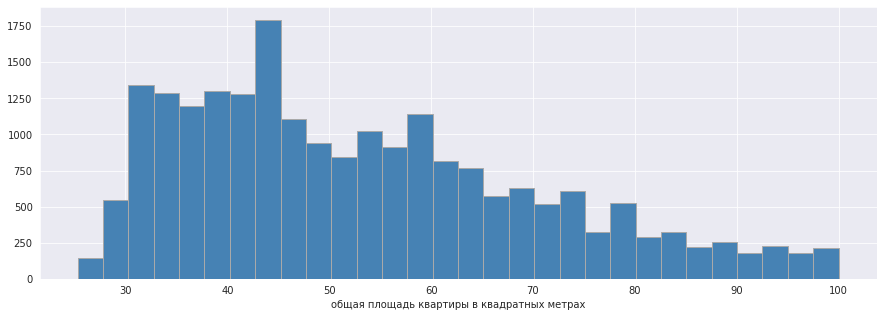

In [72]:
histogram(df['total_area'],heading='общая площадь квартиры в квадратных метрах', quantile2=0.92)

Среднее значение: 34.54
Медианное значение: 30.0
Минимальное значение: 5.4
Максимальное значение: 409.7


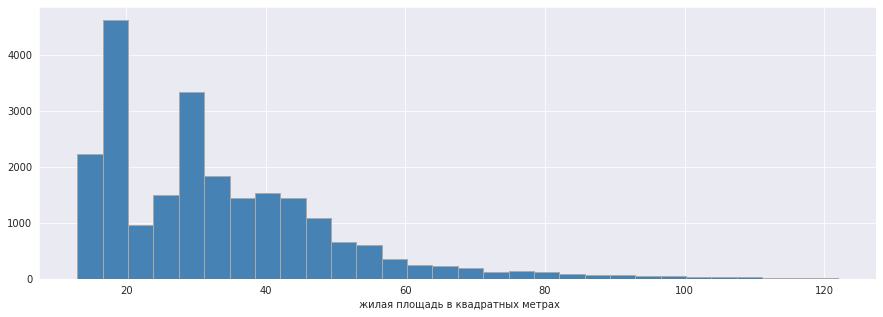

In [73]:
histogram(df['living_area'],heading=' жилая площадь в квадратных метрах', quantile2=0.99)

`kitchen_area` 2267 значений кухонь были заполнены 0, quantile1 = сделаем 10%, что бы убрать эти значения

Среднее значение: 9.53
Медианное значение: 9.0
Минимальное значение: 0.0
Максимальное значение: 112.0


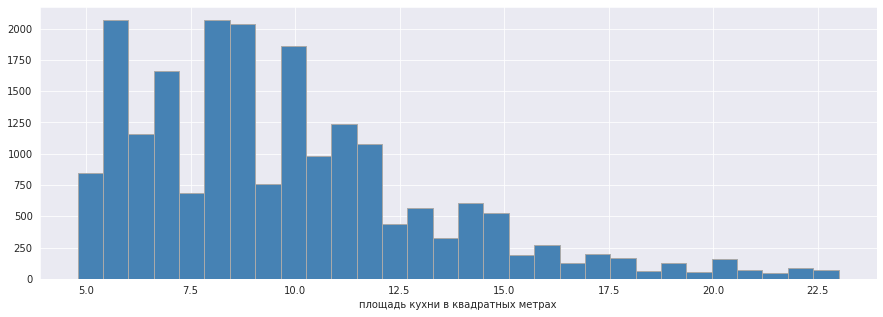

In [74]:
histogram(df['kitchen_area'],heading='площадь кухни в квадратных метрах',quantile1=0.1, quantile2=0.97)

Среднее значение: 6541312.11
Медианное значение: 4650000.0
Минимальное значение: 430000.0
Максимальное значение: 763000000.0


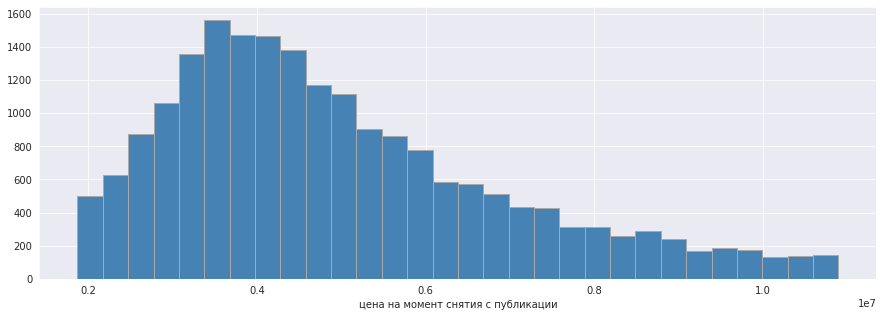

In [75]:
histogram(df['last_price'],heading='цена на момент снятия с публикации',quantile1=0.05, quantile2=0.9)

Среднее значение: 2.72
Медианное значение: 2.7
Минимальное значение: 1.0
Максимальное значение: 100.0


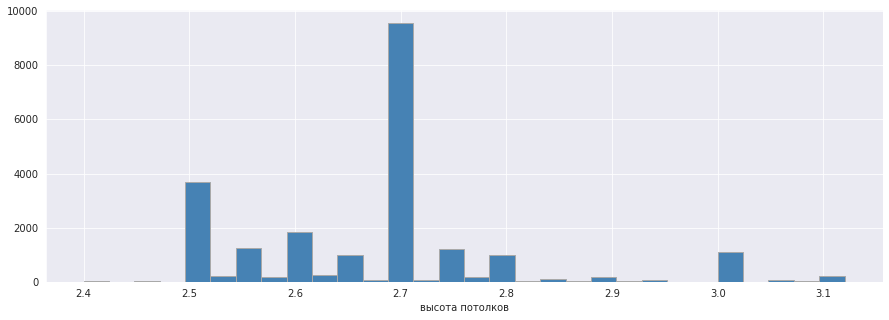

In [76]:
histogram(df['ceiling_height'],heading='высота потолков',quantile1=0.001, quantile2=0.95)

Среднее значение: 2.07
Медианное значение: 2.0
Минимальное значение: 0
Максимальное значение: 19


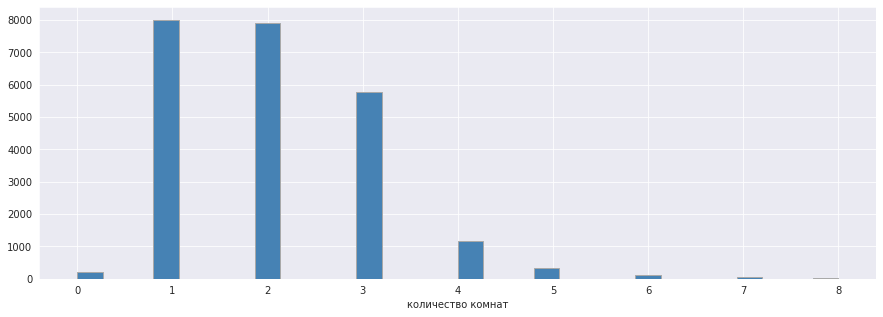

In [77]:
histogram(df['rooms'],heading='количество комнат',quantile1=0.00, quantile2=0.999)

Среднее значение: 5.89
Медианное значение: 4.0
Минимальное значение: 1
Максимальное значение: 33


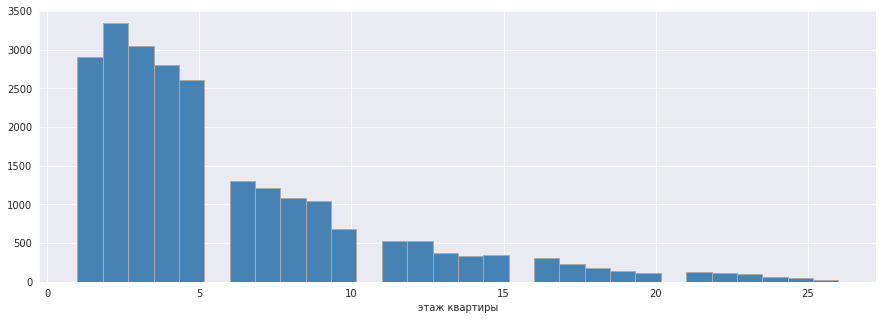

In [78]:
histogram(df['floor'],heading='этаж квартиры',quantile1=0.00, quantile2=0.999)

Что бы вывести на гистограмму тип этажа квартиры, надо сделать новый столбец и присвоить текстовым значениям числовые

In [79]:
df['new_floor_disunion'] = df.apply(floor_disunion_new, axis = 1)
df['new_floor_disunion'] = df['new_floor_disunion'].astype('int')

Среднее значение: 2.02
Медианное значение: 2.0
Минимальное значение: 1
Максимальное значение: 3


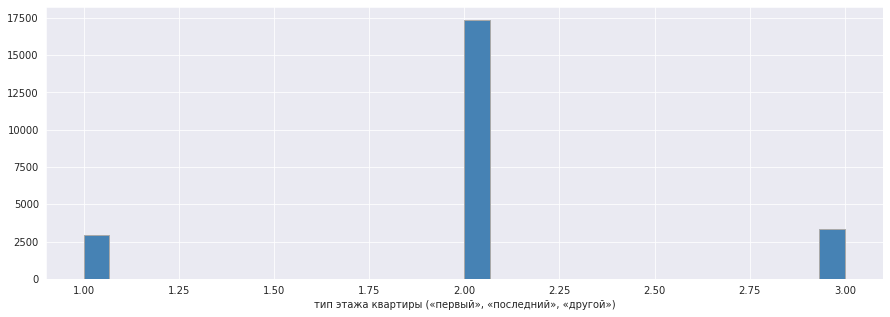

In [80]:
histogram(df['new_floor_disunion']
          ,heading='тип этажа квартиры («первый», «последний», «другой»)', quantile1=0.00, quantile2=0.97)

Среднее значение: 10.67
Медианное значение: 9.0
Минимальное значение: 1
Максимальное значение: 37


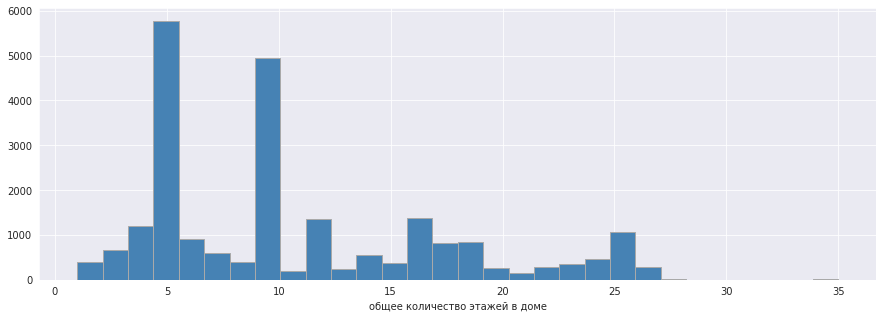

In [81]:
histogram(df['floors_total'],heading='общее количество этажей в доме',quantile1=0.00, quantile2=0.999)

Среднее значение: 14200.74
Медианное значение: 13105.0
Минимальное значение: 181.0
Максимальное значение: 65968.0


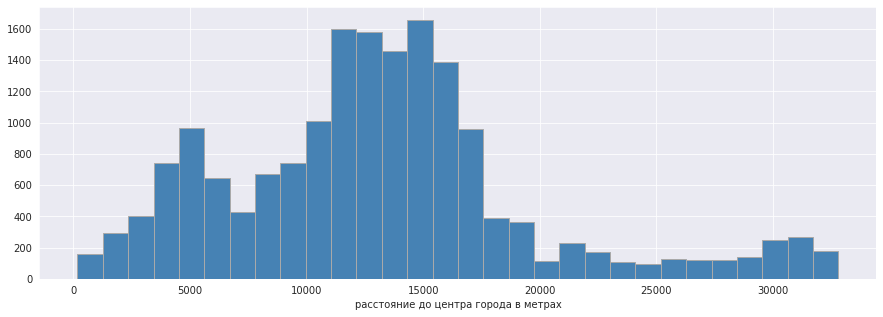

In [82]:
histogram(df['cityCenters_nearest'],heading='расстояние до центра города в метрах',quantile1=0.00, quantile2=0.96)

Среднее значение: 28803.83
Медианное значение: 26755.5
Минимальное значение: 0.0
Максимальное значение: 84869.0


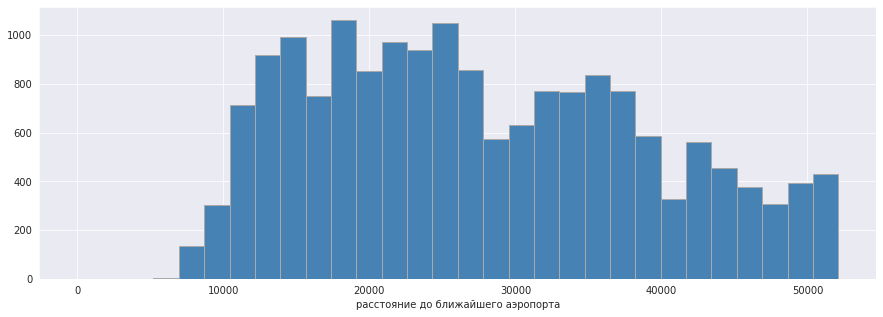

In [83]:
histogram(df['airports_nearest'],heading='расстояние до ближайшего аэропорта',quantile1=0.00, quantile2=0.96)

Среднее значение: 490.95
Медианное значение: 455.0
Минимальное значение: 1.0
Максимальное значение: 3190.0


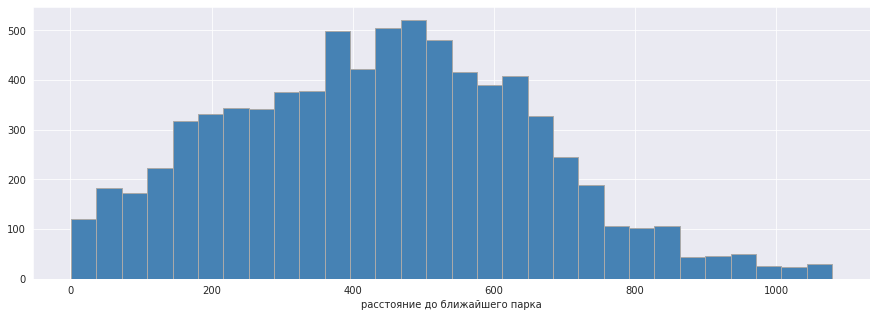

In [84]:
histogram(df['parks_nearest'],heading='расстояние до ближайшего парка',quantile1=0.00, quantile2=0.96)

Среднее значение: 2.57
Медианное значение: 3.0
Минимальное значение: 0
Максимальное значение: 6


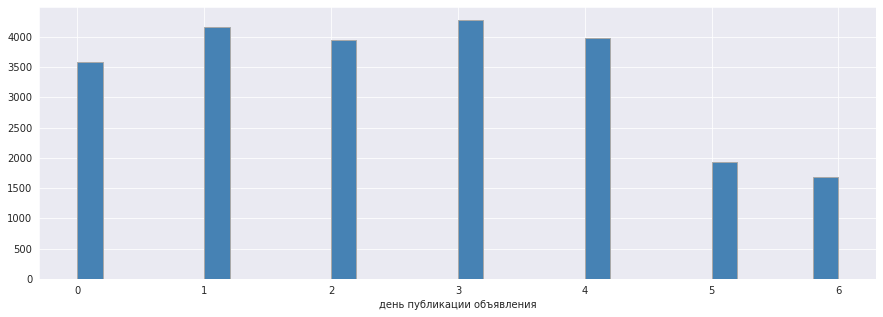

In [85]:
histogram(df['day_submission'],heading='день публикации объявления',quantile1=0.00, quantile2=1)

Среднее значение: 6.4
Медианное значение: 6.0
Минимальное значение: 1
Максимальное значение: 12


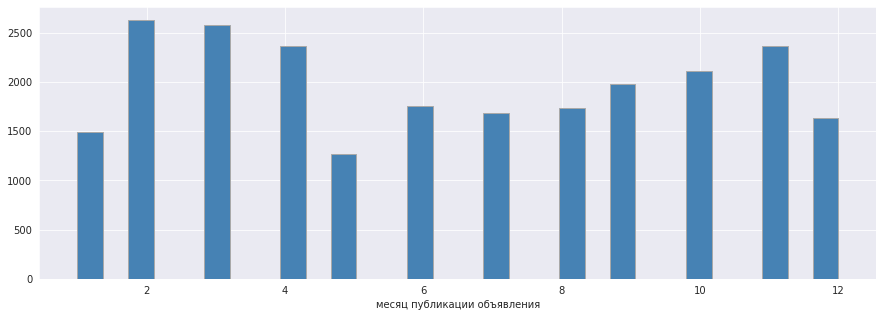

In [86]:
histogram(df['month_submission'],heading='месяц публикации объявления',quantile1=0.00, quantile2=1)

Построили 14 гистограмм, на основе них можно сделать выводы:
* Большая часть лотов находится в диапазоне 30-47 м, скорее всего это 1-2х комнатные, следом идут 50-70 это скорее типовые 2-3х комнатные. Это видно по распределению как обшей площади, так и жилой
* По кухням: порядка 2500 квартир мы заполнили 0, но из данных, которые есть это от 5 до 12,5 метров, что так же сходится с ожиданиями.
* Цены квартир от 4 до 7 миллионов
* Высота потолков 2,5-2,8 и приличный пул с 3-3.4 (в городе много "сталинок", там как правило потолки 3,4 метра)
* В основном на продажу представлены 1-3х комнатные лоты
* По этажам, все три графика выглядят взаимосвязанно. Много 4-5 этажек, потом с 10 плавно опускается к 25. Так же распределяется количество объявлений по этажам. Первых и последних меньше чем остальных
* Из распределения расстояния до центра, можно выделить две группы, окраина - 15км  и центр - 5км.Квартир больше на окраине, возможно это связано с новой застройкой.
* Аэропорт находится в пригороде, это видно и из распределения, и по Яндекс картам, а вот парков в городе хватает, почти у всех есть в пешей доступности.
* Чаще объявление выкладывают в будни, причем в понедельник реже, чем остальные будние дни.
* По месяца, меньше всего в мае, возможно связанно с праздниками

Изучив, как быстро продавались квартиры, можно заметить странную аномалию на 45 и 60 день, думаю или в это время платформа снимает объявление, и пользователь его не восстанавливает или происходит какая-то машинная заливка данных (крупный застройщик), который в эти даты просто перезаливает объявления.  
Если это время не брать к рассмотрению, то можно ответить продажа обычно занимает от 45 дней до 4 месяцев. Если квартира продалась в первый полгода, считаю это удачным соотношением цена/время. **Быстрыми продажами можно считать все что продалось в первые 45 дней после публикации объявления,при этом  снятие объявления не означает продажу квартиры.**   
Дольше всего дней (1580) на продаже стоит квартира из Ново Девяткино  с ценой 72614 кв.м, квартира выглядит живой, есть 11 фотографий, странно что она так долго продается. Возможно дом еще не сдан и это долгострой.

In [87]:
df['days_exposition'].describe()

count    20402.000000
mean       180.865945
std        219.889247
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [88]:
df[df['days_exposition'] == 1580]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_submission,month_submission,year_submission,floor_disunion,cityCenters_kilometer,new_floor_disunion
18749,11,3500000.0,48.2,2014-12-15,2,2.5,5,27.4,2,NaN,False,False,7.7,3,новое девяткино,NaN,NaN,NaN,NaN,NaN,NaN,1580.0,72614.11,0,12,2014,другой,NaN,2


Среднее значение: 180.87
Медианное значение: 95.0
Минимальное значение: 1.0
Максимальное значение: 1580.0


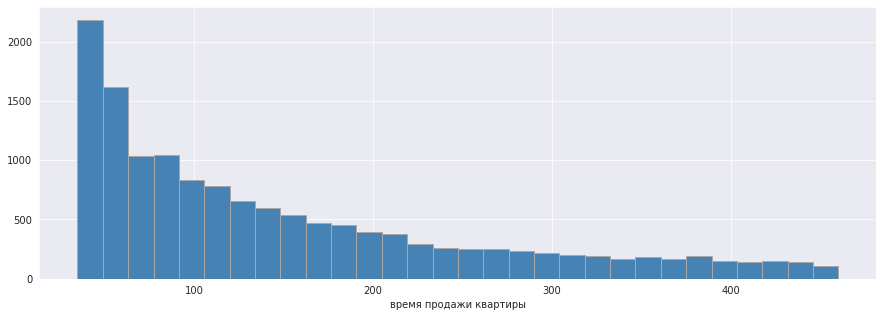

In [89]:
histogram(df['days_exposition'],heading='время продажи квартиры',quantile1=0.2, quantile2=0.9)

Среднее значение: 180.87
Медианное значение: 95.0
Минимальное значение: 1.0
Максимальное значение: 1580.0


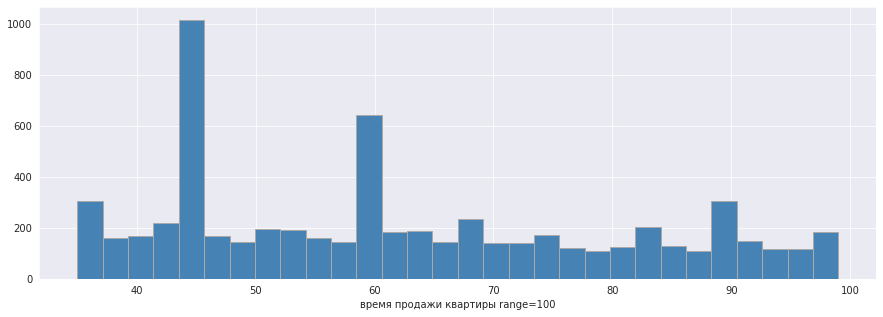

In [90]:
histogram(df['days_exposition'],heading='время продажи квартиры range=100',quantile1=0.2, quantile2=0.51)

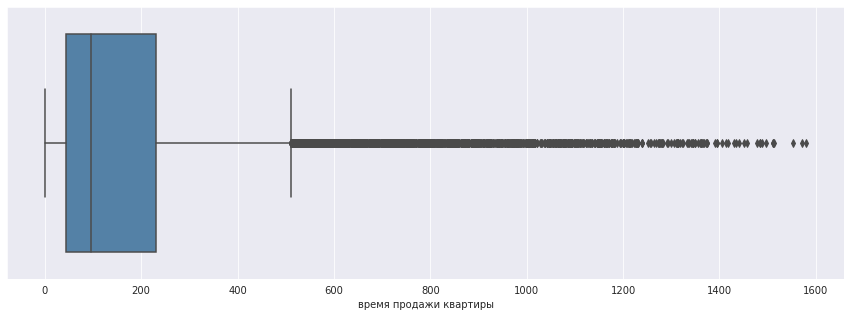

In [91]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(data=df, x='days_exposition', color='steelblue')
ax.set_xlabel('время продажи квартиры')
plt.show()

In [92]:
df['days_exposition'].value_counts().iloc[:8]

45.0    876
60.0    534
7.0     229
30.0    208
90.0    203
4.0     174
3.0     157
5.0     151
Name: days_exposition, dtype: int64

Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта

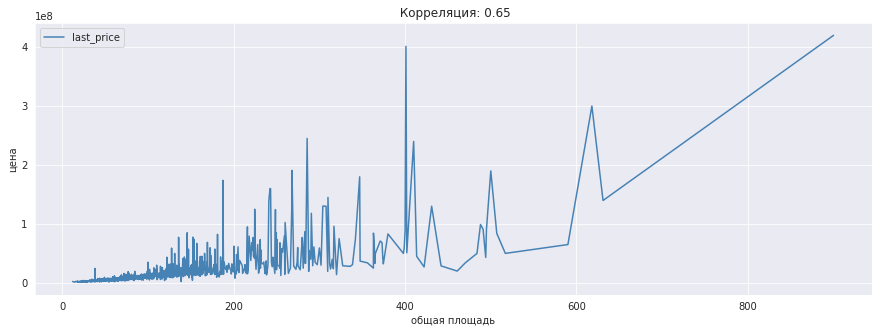

In [93]:
df.pivot_table(index ='total_area', values = 'last_price', aggfunc='median').plot(figsize=(15,5), color='steelblue')
plt.title(f" Корреляция: {(df['total_area'].corr(df['last_price']).round(2))}")
plt.xlabel('общая площадь'), plt.ylabel('цена') 
plt.show() 

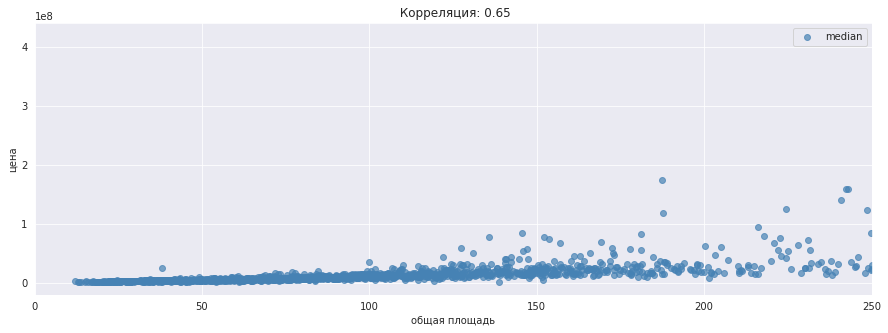

In [94]:
df_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['median'])
df_total_area.columns = ['median']
df_total_area.plot(y = 'median', style = 'o', figsize=(15,5), xlim=(0,250),  color='steelblue', alpha = 0.7)
plt.title(f" Корреляция: {(df['total_area'].corr(df['last_price']).round(2))}")
plt.xlabel('общая площадь'), plt.ylabel('цена') 
plt.show() 

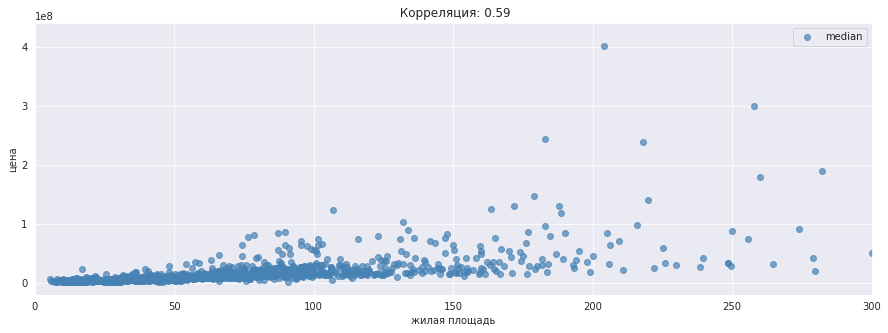

In [95]:
df_total_area = df.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['median'])
df_total_area.columns = ['median']
df_total_area.plot(y = 'median', style = 'o', figsize=(15,5), xlim=(0,300),  color='steelblue', alpha = 0.7)
plt.title(f" Корреляция: {(df['living_area'].corr(df['last_price']).round(2))}")
plt.xlabel('жилая площадь'), plt.ylabel('цена') 
plt.show() 

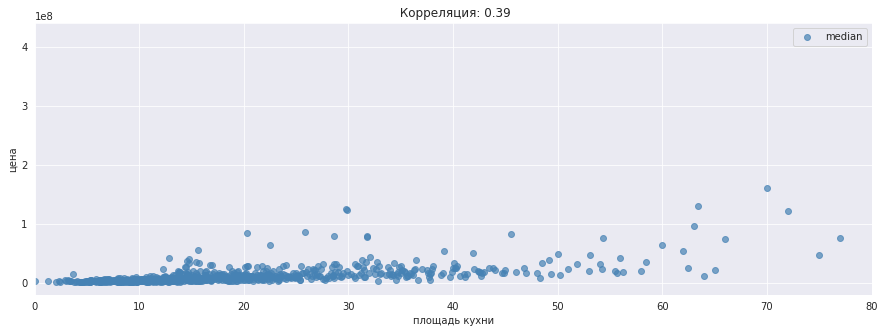

In [96]:
df_total_area = df.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['median'])
df_total_area.columns = ['median']
df_total_area.plot(y = 'median', style = 'o', figsize=(15,5), xlim=(0,80),  color='steelblue', alpha = 0.7)
plt.title(f" Корреляция: {(df['kitchen_area'].corr(df['last_price']).round(2))}")
plt.xlabel('площадь кухни'), plt.ylabel('цена') 
plt.show() 

После изучения данных можно сделать вывод, что имеется зависимость стоимости квартиры от обшей площади, это ожидаемо. Корреляция с жилой площадью ниже, с кухней еше меньше, думаю это связанно с площадью объекта

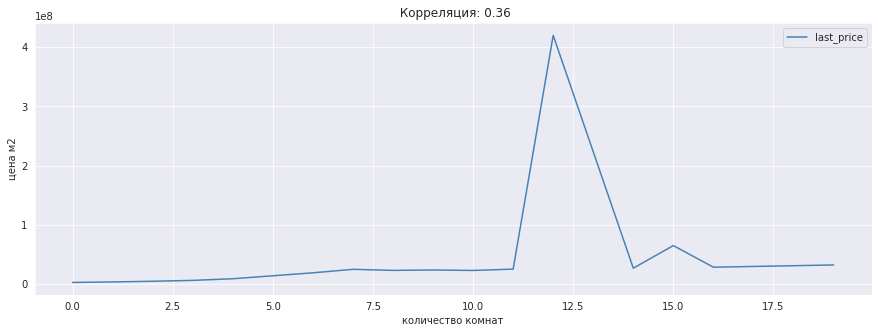

In [97]:
t = df.pivot_table(index ='rooms', values = 'last_price', aggfunc='median').plot(figsize=(15,5), color='steelblue')
plt.title(f" Корреляция: {(df['rooms'].corr(df['last_price']).round(2))}")
plt.xlabel('количество комнат'), plt.ylabel('цена м2') 
plt.show() 

In [98]:
df[df['rooms']==12]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_submission,month_submission,year_submission,floor_disunion,cityCenters_kilometer,new_floor_disunion
19441,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,NaN,False,False,112.0,0,санкт-петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,466666.67,2,12,2017,последний,8.0,3


In [99]:
df.pivot_table(index = 'rooms', values = 'total_area', aggfunc = ['median']).iloc[0:5]

,median
,total_area
rooms,
0,26.1
1,36.5
2,53.0
3,72.9
4,99.5


После изучения данных, можно сделать вывод, явной зависимости цены от количества комнат нет, на графике есть скачок, но это выброс, который мы не стали удалять. Цена растет, тк с количеством комнат увеличивается жилая площадь квартиры.  

Посмотрим как влияет этаж, на котором расположена квартира (первый, последний, другой) и  даты размещения (день недели, месяц, год)

In [100]:
t = df[['last_price','day_submission', 'month_submission', 'year_submission','floor_disunion']].copy()
t[['day_submission', 'month_submission', 'year_submission','floor_disunion']] = t[
    ['day_submission', 'month_submission', 'year_submission','floor_disunion']].astype('string')

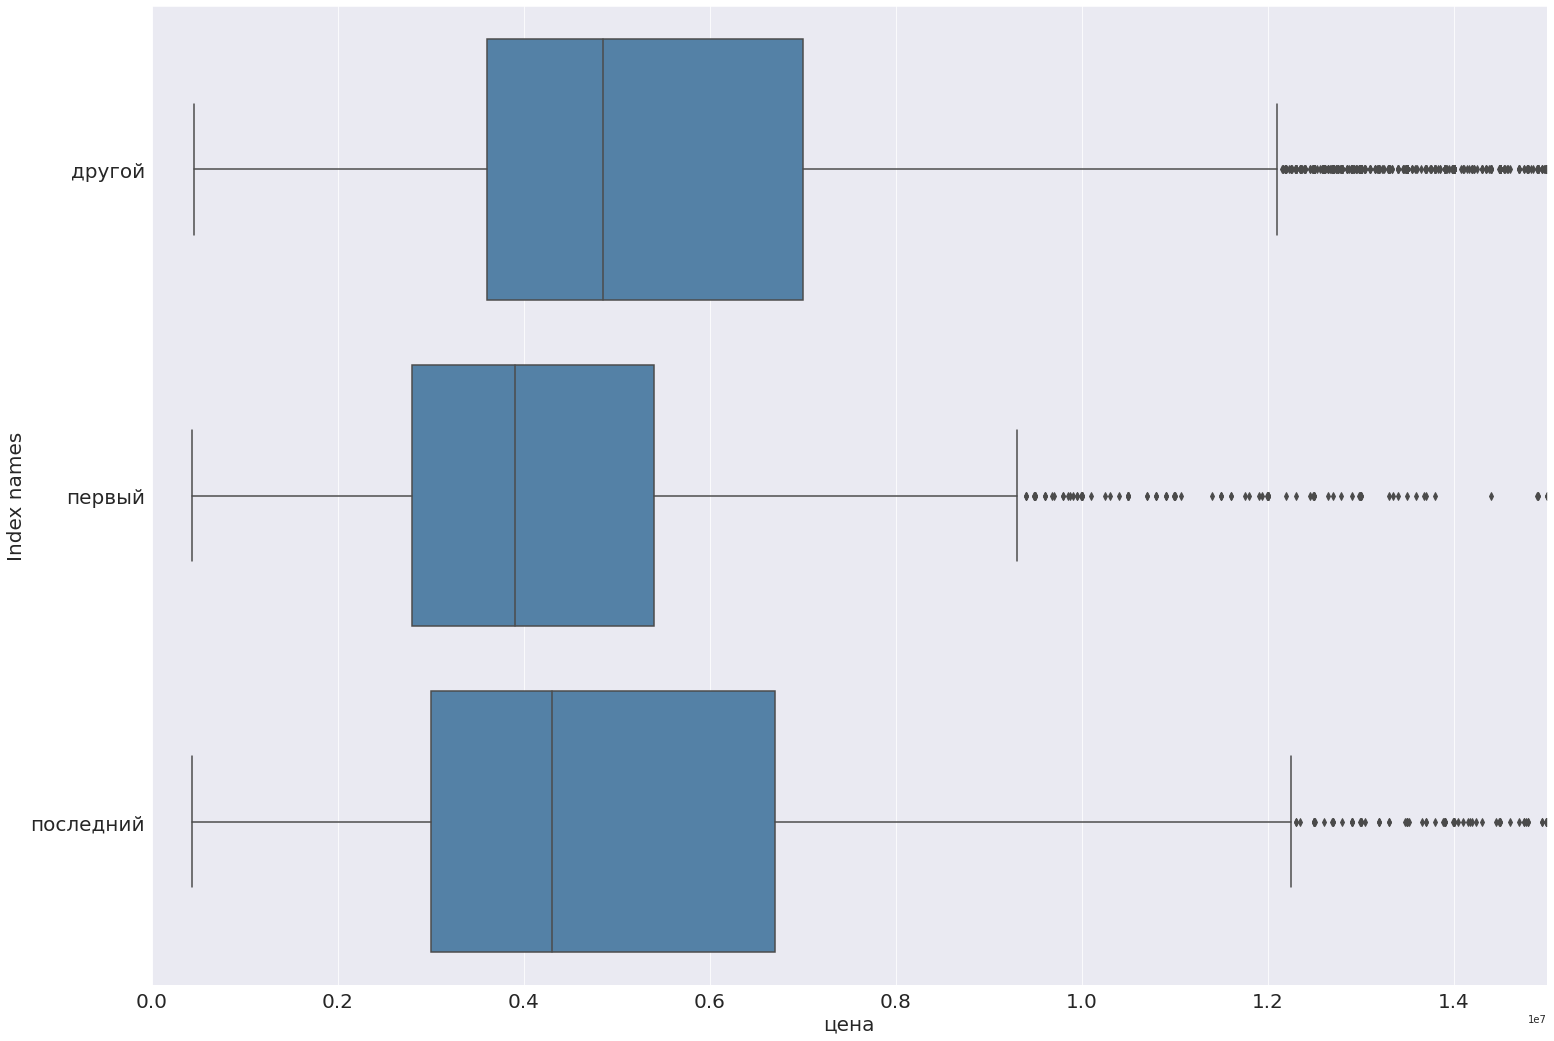

In [101]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=t, x='last_price', y='floor_disunion', color='steelblue')
ax.set_xlim(0,15000000)
ax.set_xlabel('цена', fontsize=20)
ax.set_ylabel('Index names', fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

plt.show()

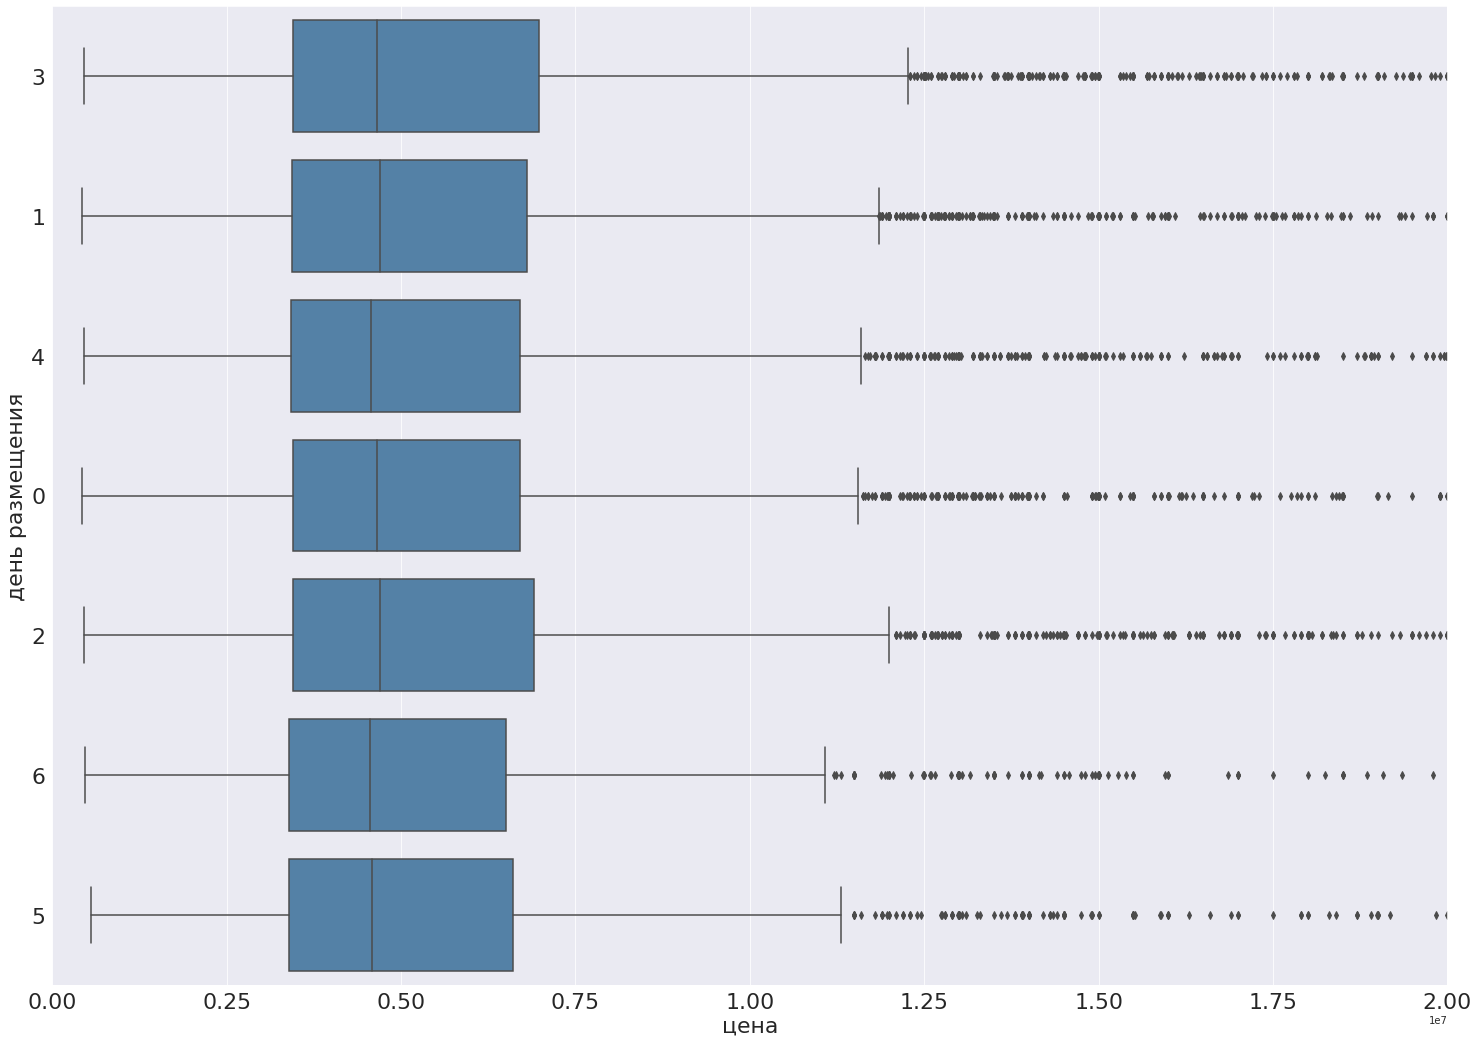

In [102]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=t, x='last_price', y='day_submission',  color='steelblue')
ax.set_xlim(0,20000000)
ax.set_xlabel('цена', fontsize=22)
ax.set_ylabel('день размещения', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

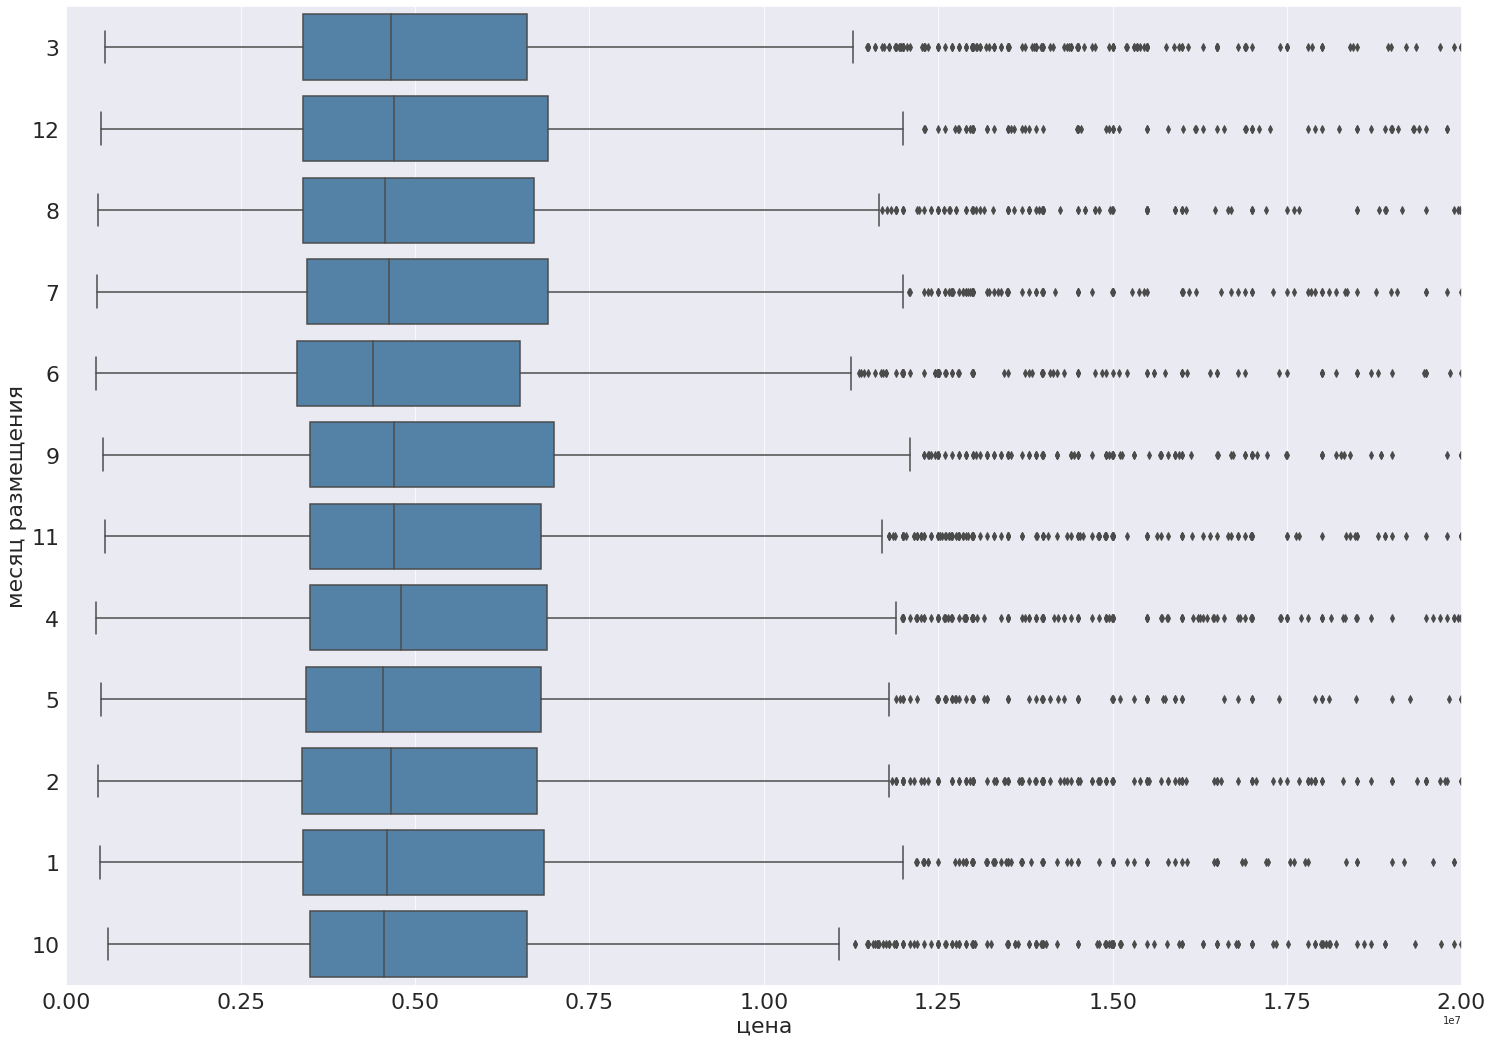

In [103]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=t, x='last_price', y='month_submission',  color='steelblue')
ax.set_xlim(0,20000000)
ax.set_xlabel('цена', fontsize=22)
ax.set_ylabel('месяц размещения', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

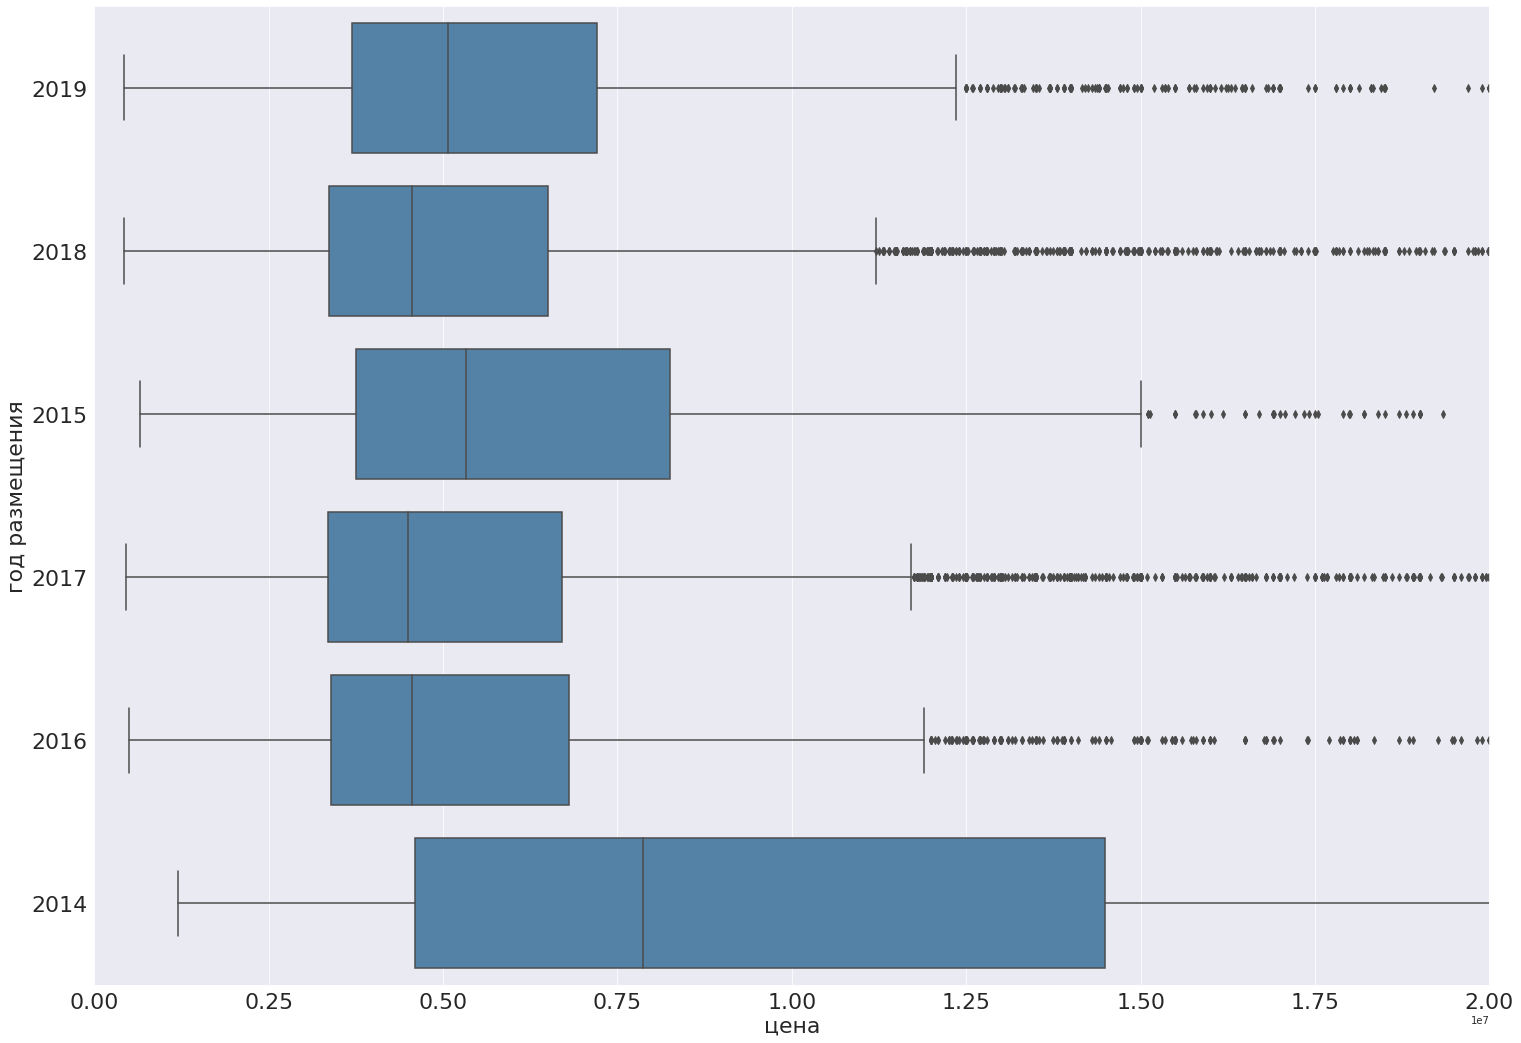

In [104]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=t, x='last_price', y='year_submission',  color='steelblue')
ax.set_xlim(0,20000000)
ax.set_xlabel('цена', fontsize=22)
ax.set_ylabel('год размещения', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

In [105]:
t.groupby('day_submission')['last_price'].describe().sort_values(by='25%').iloc[0:4]

,count,mean,std,min,25%,50%,75%,max
day_submission,,,,,,,,
5,1928.0,6.991500e+06,2.168869e+07,550000.0,3387944.25,4590000.0,6600000.0,763000000.0
6,1684.0,6.257209e+06,7.928222e+06,470000.0,3400000.00,4550000.0,6500000.0,130000000.0
4,3983.0,6.367249e+06,8.547435e+06,450000.0,3427500.00,4575000.0,6700000.0,190870000.0
1,4157.0,6.386078e+06,8.577685e+06,430000.0,3430000.00,4700000.0,6800000.0,289238400.0


Самые дешевые квартиры на первом этаже, последний этаж дороже первого, но дешевле других.  
По дням недели в целом разницы нет, но в выходные, бывает выкладывают объявления чуть дешевле, чем в другие дни.   
Цена квартиры в объявлении заметно снижается в июне, чуть меньше в мае   
А вот по годам, заметен пик в 2014, потом в 2015 цена начала снижаться, далее три года держалась на одном уровне, в 2019 стала расти


Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [106]:
cities_price_meter = df.pivot_table(index='locality_name', values='price_meter', aggfunc=['count','mean'])
cities_price_meter.columns= ['count', 'mean']
top10_cities_price_meter = cities_price_meter.sort_values(by='count', ascending=False).iloc[0:10]
top10_cities_price_meter

,count,mean
locality_name,,
санкт-петербург,15672,114779.327043
мурино,585,86003.629385
кудрово,472,95324.930508
шушары,439,78673.295877
всеволожск,395,68541.651342
пушкин,369,103125.819377
колпино,337,75480.547448
парголово,326,90135.075215
гатчина,303,68625.141155


Самая высокая цена в Санкт-Петербурге, из ТОП 10 городов только Выборг и Гатчина города Ленинградской области, 7 городов это пригородные р-н СПБ, которые де-юре являются Санкт-Петербургом. Выведем ТОП 25 объявлений (отобразим с 10 по 25) и поострим на цену кв.м

In [107]:
cities_price_meter = df.pivot_table(index='locality_name', values='price_meter', aggfunc=['count','mean'])
cities_price_meter.columns= ['count', 'mean']
top20_cities_price_meter = cities_price_meter.sort_values(by='count', ascending=False).iloc[10:25]
top20_cities_price_meter

,count,mean
locality_name,,
петергоф,200,84761.725650
сестрорецк,182,101694.014011
красное село,178,72148.588315
новое девяткино,144,76136.763542
сертолово,142,69356.105634
ломоносов,133,72724.046466
кириши,125,38875.779440
бугры,114,80552.205877
сланцы,112,18185.774286


Если смотреть объективно, то 10 место в рейтинге занимает Никольское, Тосненский р-н ЛО

Посмотрим как расстояние до центра влияет на стоимость квадрантное метра

In [108]:
price_kilometer_to_centers = df.query('locality_name == "санкт-петербург"').copy()

In [109]:
price_kilometer_to_centers.loc[price_kilometer_to_centers['cityCenters_kilometer'] == 0, 'cityCenters_kilometer'] = 1

In [110]:
price_kilometer_to_centers['price_kilometer_to_centers'] = (price_kilometer_to_centers['price_meter'] / price_kilometer_to_centers['cityCenters_kilometer']).round(2)

In [111]:
price_kilometer_to_centers = price_kilometer_to_centers[['cityCenters_kilometer', 'price_kilometer_to_centers']].dropna(subset=[
    'cityCenters_kilometer']).sort_values('cityCenters_kilometer')

In [112]:
price_kilometer_to_centers['price_kilometer_to_centers'].describe().round(2)

count      15611.00
mean       16191.72
std        34205.14
min         1783.72
25%         6602.99
50%         8701.39
75%        14844.73
max      1736842.11
Name: price_kilometer_to_centers, dtype: float64

In [113]:
price_kilometer_to_centers.query('cityCenters_kilometer < 5')['price_kilometer_to_centers'].describe().round(2)

count       1563.00
mean       64947.41
std        91666.36
min         3965.39
25%        29345.27
50%        39473.68
75%        65000.06
max      1736842.11
Name: price_kilometer_to_centers, dtype: float64

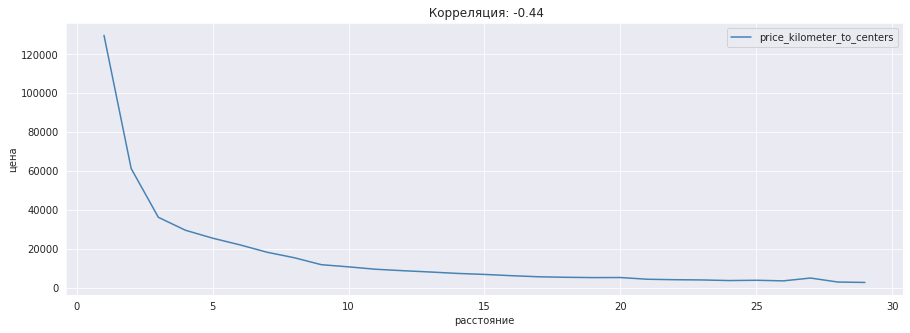

In [114]:
price_kilometer_to_centers.pivot_table(index ='cityCenters_kilometer', values = 'price_kilometer_to_centers', aggfunc='median').plot(figsize=(15,5), color='steelblue')
plt.title(f" Корреляция: {(price_kilometer_to_centers['cityCenters_kilometer'].corr(price_kilometer_to_centers['price_kilometer_to_centers']).round(2))}")
plt.xlabel('расстояние'), plt.ylabel('цена') 
plt.show() 

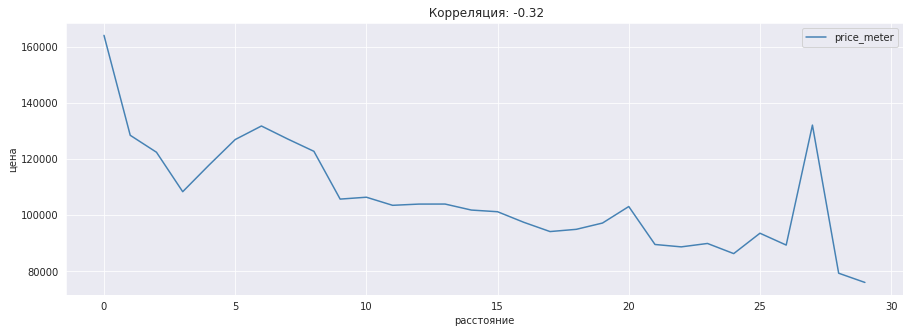

In [116]:
df.query('locality_name == "санкт-петербург"').pivot_table(index ='cityCenters_kilometer', values = 'price_meter', aggfunc='median').plot(figsize=(15,5), color='steelblue')
plt.title(f" Корреляция: {(df['cityCenters_kilometer'].corr(df['price_meter']).round(2))}")
plt.xlabel('расстояние'), plt.ylabel('цена') 
plt.show() 

На графике заметно, чем ближе к центру , тем цена выше,  средняя цена 16191.72, медиана 8701.39  
При расстоянии до 5км, большой разброс по цене,  средняя цена 64947.41, медиана 39473.68 макс 1736842.11

### Общий вывод

Мы провели исследовательский анализ данных. При изучении датафрейма встретилось много пустых значений, где было возможно, заполнили средним или медианным значением. Часть данных заполнить не удалось, очень много пропусков было в картографических данных, надо указать разработчикам на эту проблему. В своем анализе я решил сохранить максимум информации, аномальные значения отбросили за счет фильтрации. Так же для полноты изучения, мы создали ряд вспомогательных столбцов.  Для анализа построили 16 гистограмм, 5 boxplot и диаграммы рассеивания. Установили, что большая часть лотов находится в диапазоне 30-47 м2, Высота потолков 2,5-2,8 и приличный пул с 3-3.4 метра. В основном цены на квартиры от 4 до 7 миллионов. Как правило на продажу представлены 1-3х комнатные лоты, но есть и квартиры с 19-ю комнатами или ценой 763 миллиона. В Санкт-Петербурге много  застройки в 4-5 этажей, но хватает и высоток. Больше выставлено квартир для продажи  на расстоянии в 10-15 км от центра города. 
Пришли к выводу, что самые дешевые квартиры на первом этаже, последний этаж дороже первого, но дешевле других. Продажа обычно занимает от 45 дней до 4 месяцев. Самая высокая цена в Санкт-Петербурге, из пригорода дороже всего квартиры в Гатчине и Выборге. По дням недели в целом разницы нет, но в выходные, бывает выкладывают объявления чуть дешевле, чем в другие дни.
Цена квартиры в объявлении заметно снижается в июне, чуть меньше в мае. А вот по годам, заметен пик в 2014, потом в 2015 цена начала снижаться. Возможно это связанно с кризисом 14 года. Так же, чем ближе квартира к центру города, тем она дороже. В радиусе 5 км от центра средняя цена квадратного метаа 61358.24 а медианная  34293.55


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [х]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [х]  определены пропущенные значения
- [х]  заполнены пропущенные значения там, где это возможно
- [х]  есть пояснение, какие пропущенные значения обнаружены
- [х]  изменены типы данных
- [х]  есть пояснение, в каких столбцах изменены типы и почему
- [х]  устранены неявные дубликаты в названиях населённых пунктов
- [х]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [х]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [х]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [х]  посчитано и добавлено в таблицу: месяц публикации объявления
- [х]  посчитано и добавлено в таблицу: год публикации объявления
- [х]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [х]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [х]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [х]  построены гистограммы для каждого параметра
- [х]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [х]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [х]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [х]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [х]  в каждом этапе есть промежуточные выводы
- [х]  есть общий вывод